<a href="https://colab.research.google.com/github/kmayutrisna/SA_IMDB/blob/main/1_IMDB_Keras_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import necessary libraries
import pandas as pd
import re
import nltk
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
tf.compat.v1.disable_eager_execution()

In [2]:
#Get the dataset from gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Display top of data
data =pd.read_csv("drive/My Drive/data/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Display shape and data info
data.review.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Checking for missing values
data.isnull().values.any()

False

<Axes: xlabel='sentiment', ylabel='count'>

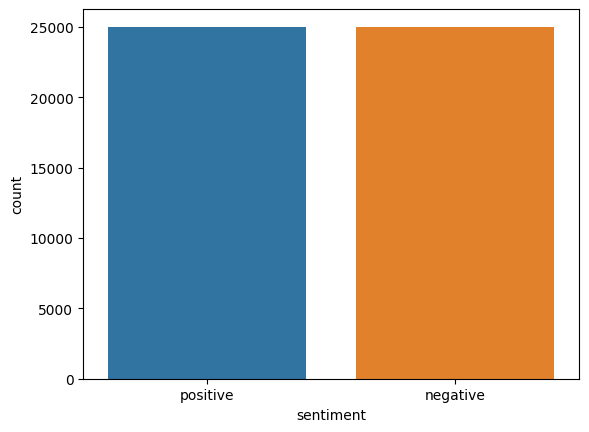

In [ ]:
sns.countplot(x='sentiment', data=data)

In [ ]:
#Display the original dara in review coloumn
data["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [4]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Text preprocessing
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

data['review'] = data['review'].apply(preprocess_text)

In [6]:
vocab_size = 5000
input_length = 300
embedding_dim = 32
num_filters = 128
kernel_size = 3

In [7]:
# Preprocess the dataset
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(sequences, maxlen=input_length)
y = data['sentiment']

In [8]:
# Convert sentiment to binary labels
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
y = data['sentiment']

In [9]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [10]:
# Build the CNN model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model and store history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
563/563 [==============================] - 84s 136ms/step - loss: 0.3905 - accuracy: 0.8194 - val_loss: 0.2864 - val_accuracy: 0.8848
Epoch 2/5
563/563 [==============================] - 28s 50ms/step - loss: 0.2556 - accuracy: 0.8998 - val_loss: 0.3398 - val_accuracy: 0.8537
Epoch 3/5
563/563 [==============================] - 18s 32ms/step - loss: 0.2175 - accuracy: 0.9137 - val_loss: 0.2991 - val_accuracy: 0.8813
Epoch 4/5
563/563 [==============================] - 14s 26ms/step - loss: 0.1949 - accuracy: 0.9249 - val_loss: 0.3102 - val_accuracy: 0.8777
Epoch 5/5
563/563 [==============================] - 12s 21ms/step - loss: 0.1634 - accuracy: 0.9373 - val_loss: 0.3617 - val_accuracy: 0.8758


In [13]:
# Predict the test set probabilities
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()


313/313 [==============================] - 2s 5ms/step


In [14]:
# Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8766
Precision: 0.8719452590420332
Recall: 0.8850962492558048
F1-score: 0.8784715383100256


In [15]:
# Plot model performance

def plot_model_performance(history):
    # Accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Loss
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

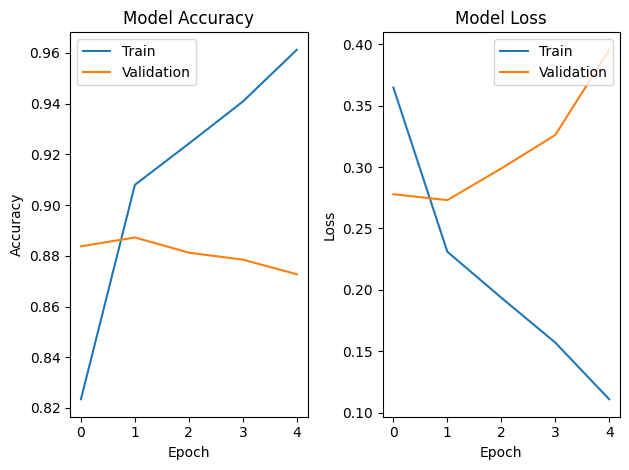

In [ ]:
# Plot the model performance
plot_model_performance(history)

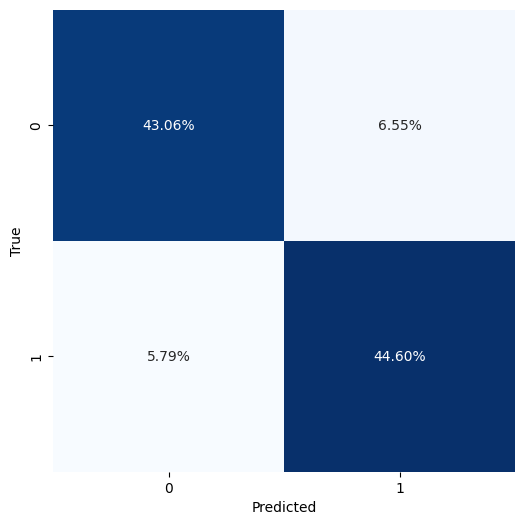

In [16]:
# Calculate the confusion matrix

cm = confusion_matrix(y_test, y_pred_binary)
# Normalize the confusion matrix to display percentages out of the total
cm_norm = cm.astype('float') / cm.sum()

plt.figure(figsize=(6, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()